In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('model_building/datasets/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df['Diabetes_01'] = df['Diabetes_012'].copy()
df['Diabetes_01'][df['Diabetes_012'] == 2] = 1
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_01
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [4]:
for col in df.columns:
    try:
        df[col] = df[col].astype(int)
    except:
        pass
    order = df[col].value_counts().index.sort_values()
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories = order)
    df[col] = df[col].astype(ordered_var)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  category
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   HeartDiseaseorAttack  253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

In [5]:
df['Diabetes_01'] = df['Diabetes_01'].astype(int)
df['Diabetes_012'] = df['Diabetes_012'].astype(int)
df['BMI'] = df['BMI'].astype(int)

In [21]:
color_palette(['#2980b9', '#558b2f', '#a9f5f2', '#ffffff'])

[(0.1607843137254902, 0.5019607843137255, 0.7254901960784313),
 (0.3333333333333333, 0.5450980392156862, 0.1843137254901961),
 (0.6627450980392157, 0.9607843137254902, 0.9490196078431372),
 (1.0, 1.0, 1.0)]

In [15]:
sns.color_palette(['#2980b9', '#558b2f', '#d9f0e3', '#ffffff'])

[(0.1607843137254902, 0.5019607843137255, 0.7254901960784313),
 (0.3333333333333333, 0.5450980392156862, 0.1843137254901961),
 (0.8509803921568627, 0.9411764705882353, 0.8901960784313725),
 (1.0, 1.0, 1.0)]

In [9]:
sns.color_palette(['#d9f0e3', '#87cefa', '#2980b9'])

[(0.8509803921568627, 0.9411764705882353, 0.8901960784313725),
 (0.5294117647058824, 0.807843137254902, 0.9803921568627451),
 (0.1607843137254902, 0.5019607843137255, 0.7254901960784313)]

In [8]:
# colors = sns.color_palette(['#bcbd22', '#2ecc71', '#ffffff'])
# colors

[(0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.1803921568627451, 0.8, 0.44313725490196076),
 (1.0, 1.0, 1.0)]

In [67]:
sns.set_theme(font_scale=.9)
sns.set_palette(['#2980b9', '#558b2f', '#d9f0e3', '#ffffff'])
colors = sns.color_palette()
primary = colors[1]
sns.set_style(rc={"axes.facecolor" : colors[2], 'figure.facecolor':colors[2]})
title_style = {'size':12, 'color': colors[1], 'weight':'bold'}
axes_style = {'size':10, 'color': colors[1], 'weight':'bold'}

In [89]:
bmi_encodings = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Extremely Obese']
diab_encodings = ['Non-Diabetic', 'Pre-Diabetic', 'Diabetic']
diab_bin_encodings = ['Non-Diabetic', 'Diabetic']
sex_encodings = ['F', 'M']
# age encodings
# ages have been grouped into categories, and these will not make meaninful labels.
# thus, a list of the age encodings will be generated for proper labelling.
age_encodings = []

age_categories = df.Age.unique().sort_values()

lower, upper = 18, 24
for age in age_categories:
    if age==1:
        pass
    elif age==2:
        lower+=7
        upper+=5
    else:
        lower+=5
        upper+=5
    age_encodings.append(f'{lower}-{upper}')

# adjust the last range to capture all values greater than 80
age_encodings[-1] = '>=80'


In [68]:
def plot_diab_bmi_sex(age, BMI):
    fig = plt.figure(figsize=(6,5))
    sns.pointplot(data=df, x='Age', y='BMI', hue='Sex')
    sns.scatterplot(x=[6], y=[29], marker='*', s=250, color='red', alpha=.8)
    plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
    plt.title("Diabetes by Age and Sex", fontdict=title_style)
    plt.xlabel("Age", fontdict=axes_style)
    plt.ylabel("BMI", fontdict=axes_style)
    plt.legend(sex_encodings)
    return (fig)

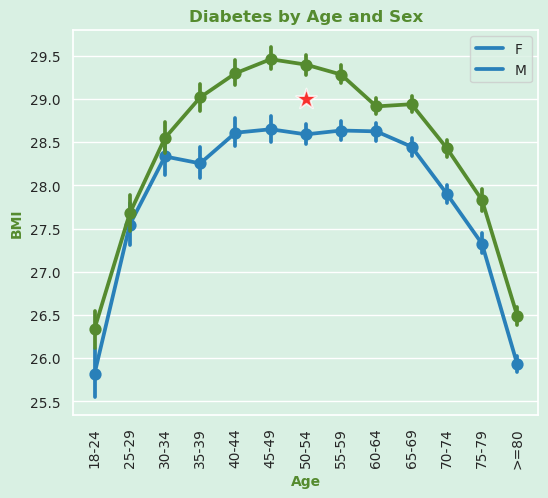

In [69]:
fig = plot_diab_bmi_sex(6, 34)

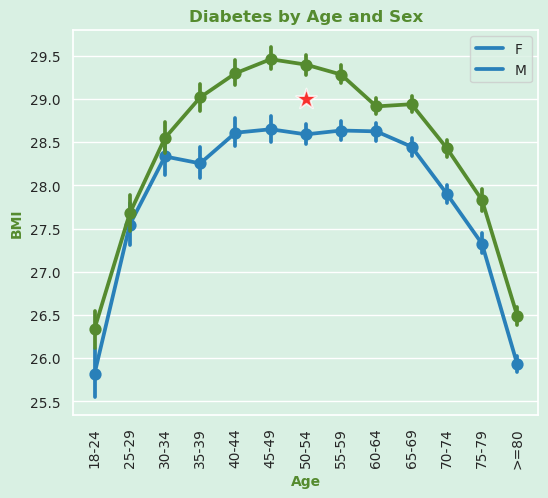

In [70]:
fig

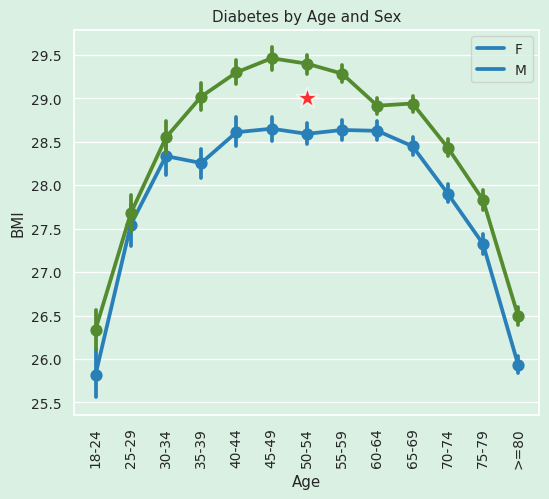

In [82]:
fig = plt.figure(figsize=(6,5))
sns.pointplot(data=df, x='Age', y='BMI', hue='Sex')
sns.scatterplot(x=[6], y=[29], marker='*', s=250, color='red', alpha=.8)
plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
plt.title("Diabetes by Age and Sex")
plt.legend(sex_encodings)

In [42]:
df.BMI.min()

12

In [50]:
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

width : float or array-like, default: 0.8
    The width(s) of the bars.

bottom : float or array-like, default: 0
    The y coordinate(s) of the bottom side(s) of the bars.

align : {'center', 'edge'}, default: 'center'
    Alignment of the bars to the *x* coordinates:

    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left ed

Text(0, 0.5, 'Frequency')

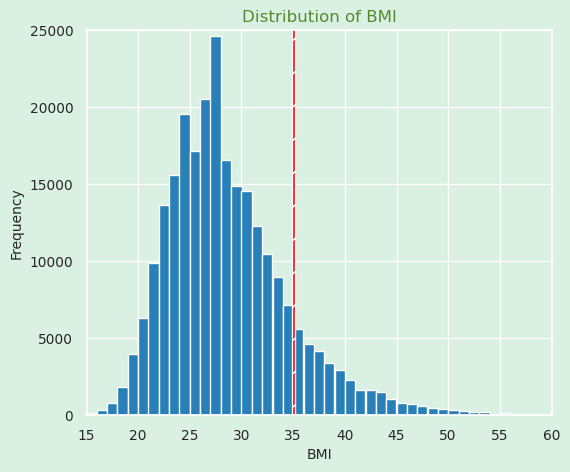

In [59]:
fig = plt.figure(figsize=(6,5))
bins = np.arange(df.BMI.min(), df.BMI.max()+1, 1)
plt.hist(data=df, x='BMI', bins=bins);
plt.bar(x=35, height=28000, width=.3, color='red', hatch='/')
plt.xlim(15, 60);
plt.ylim(0, 25000)
plt.xlabel('BMI');
plt.ylabel('Frequency');
plt.title('Distribution of BMI', fontdict=title_style);
plt.xlabel('BMI', fontdict=axes_style)
plt.ylabel('Frequency', fontdict=axes_style)

In [75]:
def plot_diab_bmi_sex(age, BMI):
    fig = plt.figure(figsize=(6,5))
    sns.pointplot(data=df, x='Age', y='BMI', hue='Sex')
    sns.scatterplot(x=[6], y=[29], marker='*', s=250, color='red', alpha=.8)
    plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
    plt.title("Diabetes by Age and Sex", fontdict=title_style)
    plt.xlabel("Age", fontdict=axes_style)
    plt.ylabel("BMI", fontdict=axes_style)
    plt.legend(sex_encodings)
    return (fig)

### Plot 1

In [72]:
def plot_bmi_dist(bmi):
    fig = plt.figure(figsize=(6,5))
    bins = np.arange(df.BMI.min(), df.BMI.max()+1, 1)
    plt.hist(data=df, x='BMI', bins=bins);
    plt.bar(x=bmi, height=28000, width=.3, color='red', hatch='/')
    plt.xlim(15, 60);
    plt.ylim(0, 25000)
    plt.xlabel('BMI');
    plt.ylabel('Frequency');
    plt.title('Distribution of BMI', fontdict=title_style);
    plt.xlabel('BMI', fontdict=axes_style)
    plt.ylabel('Frequency', fontdict=axes_style)

    return (fig)

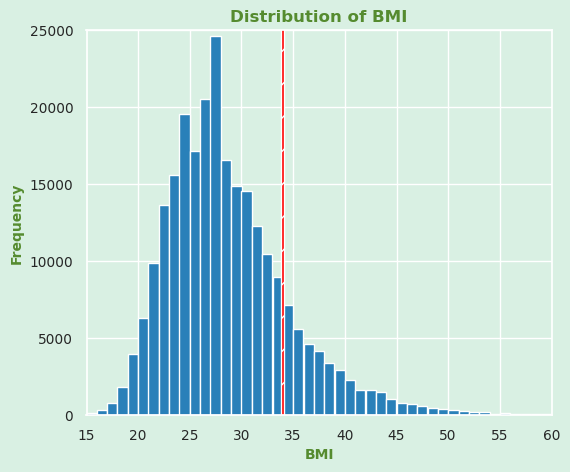

In [73]:
fig = plot_bmi_dist(34)

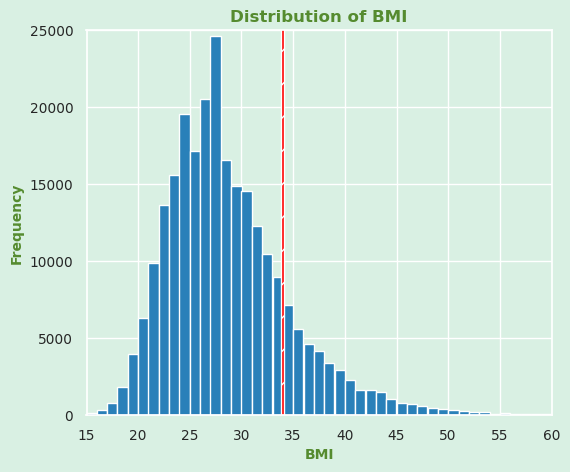

In [74]:
fig

In [86]:
# bmi, gender, diagnosis
fig= plt.figure(figsize=(6,5))

sns.(data=df, y='BMI', x='Age', hue='Sex');

plt.xticks(ticks=np.arange(13), labels=age_encodings, rotation=90);
plt.xlabel('Age Ranges(yrs)');
plt.ylabel('Average BMI');
plt.title('Trend of BMI Across Ages for Each Gender');

ValueError: Cannot pass values for both `x` and `y`

<Figure size 600x500 with 0 Axes>

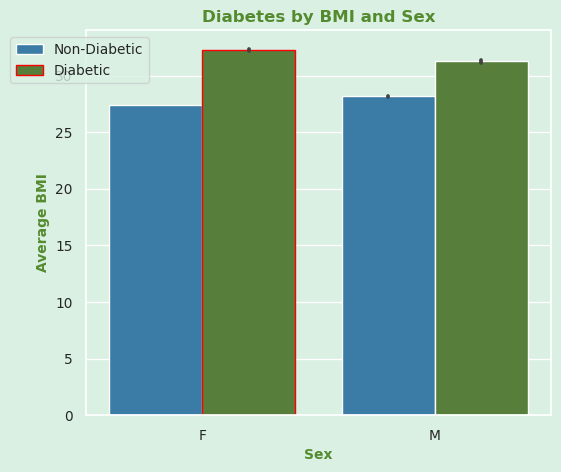

In [112]:
# diabetes to BMI and Sex
fig = plt.figure(figsize=(6,5))
g = sns.barplot(data=df, x='Sex', y='BMI', hue='Diabetes_01');

sex = 1
diag =  0

idx = 0
if sex==0 and diag==0: # female, non-diabetic
    idx = 0
elif sex==0 and diag==1: # female, diabetic
    idx = 1
elif sex==1 and diag==0: # male, non-diabetic
    idx = 2
elif sex==1 and diag==1: # male, diabetic
    idx=3

# highlight class
g.patches[idx].set_edgecolor('red')

plt.xticks(ticks=np.arange(2), labels=sex_encodings);
plt.xlabel('Sex', fontdict=axes_style);
plt.ylabel('Average BMI', fontdict=axes_style);
plt.title('Diabetes by BMI and Sex', fontdict=title_style);
plt.legend(bbox_to_anchor=[0.15,1], title='')
for t,l in zip(g.legend_.texts, diab_bin_encodings):
    t.set_text(l)

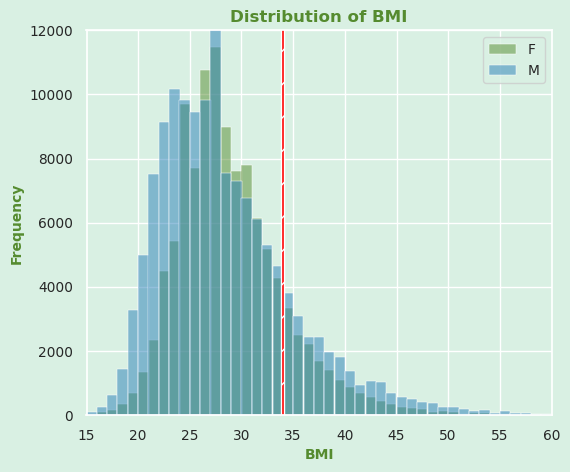

In [81]:
fig = plt.figure(figsize=(6,5))
bins = np.arange(df.BMI.min(), df.BMI.max()+1, 1)
# plt.hist(data=df, x='BMI', bins=bins);
sns.histplot(data=df, x='BMI', hue='Sex', bins=bins)
plt.bar(x=34, height=28000, width=.3, color='red', hatch='/')
plt.xlim(15, 60);
plt.ylim(0, 12000)
plt.xlabel('BMI');
plt.ylabel('Frequency');
plt.title('Distribution of BMI', fontdict=title_style);
plt.xlabel('BMI', fontdict=axes_style)
plt.ylabel('Frequency', fontdict=axes_style)
plt.legend(sex_encodings)

### Plot 2

In [121]:
def plot_diag_by_bmi_sex(diag, sex):
    # diabetes to BMI and Sex
    fig = plt.figure(figsize=(6,5))
    g = sns.barplot(data=df, x='Sex', y='BMI', hue='Diabetes_01');

    idx = 0
    if sex==0 and diag==0: # female, non-diabetic
        idx = 0
    elif sex==0 and diag==1: # female, diabetic
        idx = 1
    elif sex==1 and diag==0: # male, non-diabetic
        idx = 2
    elif sex==1 and diag==1: # male, diabetic
        idx=3

    # highlight class
    g.patches[idx].set_edgecolor('red')

    plt.xticks(ticks=np.arange(2), labels=sex_encodings);
    plt.xlabel('Sex', fontdict=axes_style);
    plt.ylabel('Average BMI', fontdict=axes_style);
    plt.title('Diabetes by BMI and Sex\n', fontdict=title_style);
    plt.legend(bbox_to_anchor=[0.15,1.1], title='')
    for t,l in zip(g.legend_.texts, diab_bin_encodings):
        t.set_text(l)
    
    return (fig)

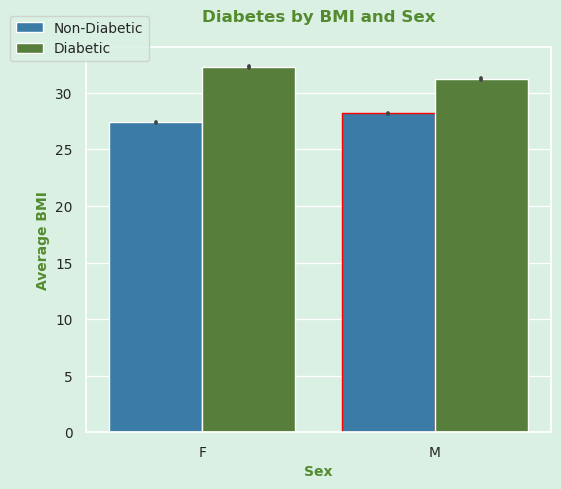

In [123]:
fig = plot_diag_by_bmi_sex(1, 0)

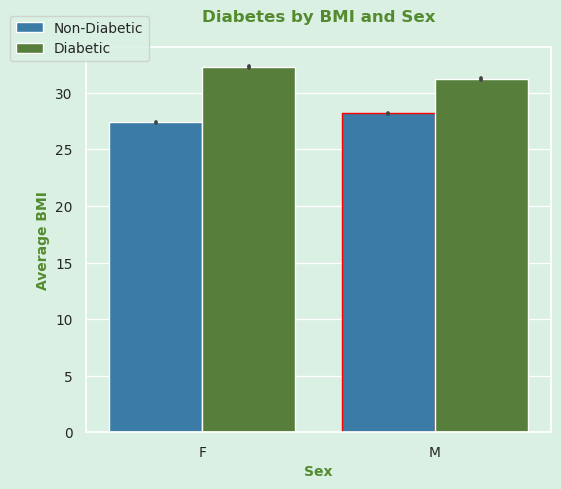

In [124]:
fig

In [125]:
def categorize_bmi(value):

    """This function takes a BMI value and checks which range it falls in.
    It then returns which category of BMI the given value falls in."""
    
    if value < 18.5:
        return 1
    elif value>=18.5 and value<=24.9:
        return 2
    elif value>=25.0 and value<=29.9:
        return 3
    elif value>=30.0 and value<=39.9:
        return 4
    elif value>=40.0:
        return 5
        
df['BMICategory'] = df.BMI.apply(categorize_bmi)

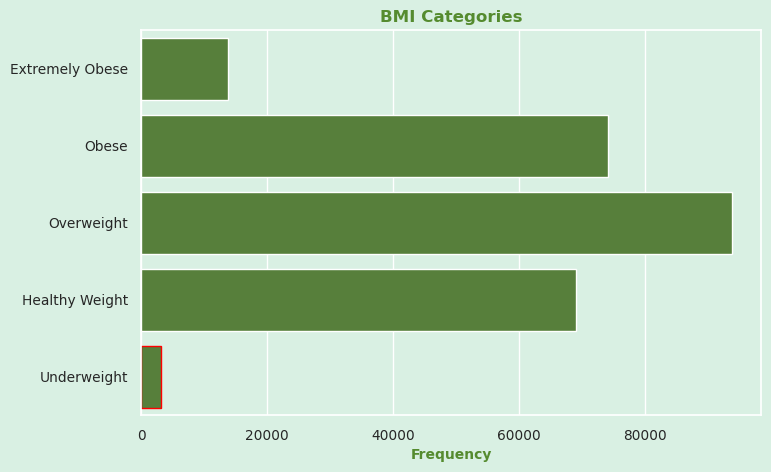

In [136]:
fig=plt.figure(figsize=(8,5))
g = sns.countplot(data=df, y='BMICategory', color=primary, orient='h', order = [5,4,3,2,1]);

g.patches[5 - (categorize_bmi(17))].set_edgecolor('red')
# the order of patches is reversed

plt.yticks(ticks = np.arange(5), labels=bmi_encodings[::-1]);
plt.xlabel('Frequency', fontdict=axes_style);
plt.ylabel('');
plt.title('BMI Categories', fontdict=title_style);

### Plot 3

In [141]:
def plot_bmi_category(bmi):
    fig=plt.figure(figsize=(6,5))
    g = sns.countplot(data=df, y='BMICategory', color=primary, orient='h', order = [5,4,3,2,1]);

    g.patches[5 - (categorize_bmi(bmi))].set_edgecolor('red')
    # the order of patches is reversed

    plt.yticks(ticks = np.arange(5), labels=bmi_encodings[::-1]);
    plt.xlabel('Frequency', fontdict=axes_style);
    plt.ylabel('');
    plt.title('BMI Categories', fontdict=title_style);

    return (fig)

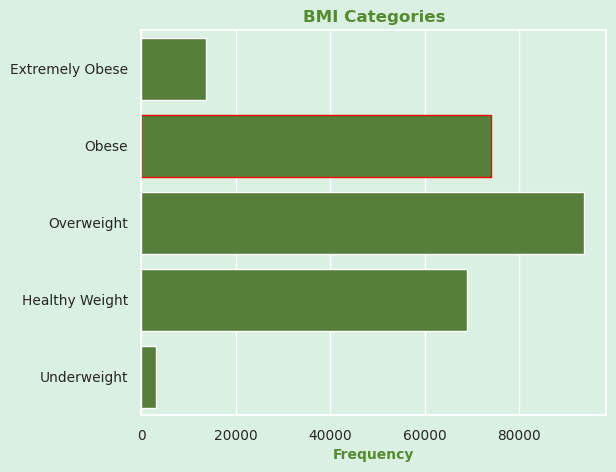

In [142]:
fig = plot_bmi_category(32)

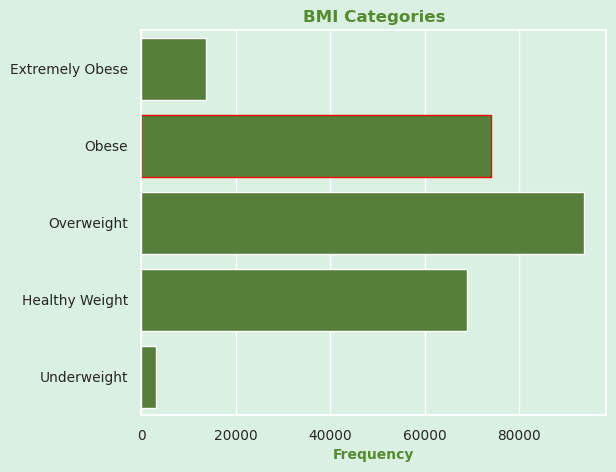

In [143]:
fig

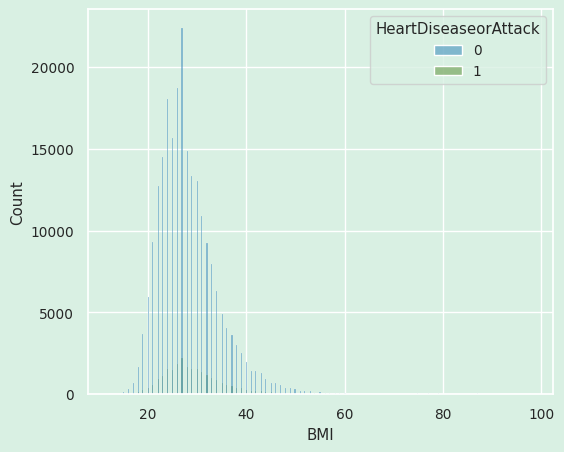

In [154]:
# diabetes to BMI and Sex
fig = plt.figure(figsize=(6,5))
g = sns.barplot(data=df, x='HeartDiseaseorAttack', y='BMI', hue='Diabetes_01');

# idx = 0
# if sex==0 and diag==0: # female, non-diabetic
#     idx = 0
# elif sex==0 and diag==1: # female, diabetic
#     idx = 1
# elif sex==1 and diag==0: # male, non-diabetic
#     idx = 2
# elif sex==1 and diag==1: # male, diabetic
#     idx=3

# # highlight class
# g.patches[idx].set_edgecolor('red')

plt.xticks(ticks=np.arange(2), labels=sex_encodings);
plt.xlabel('Heart Disease/Attack', fontdict=axes_style);
plt.ylabel('Average BMI', fontdict=axes_style);
plt.title('Risk of Heart Disease\n', fontdict=title_style);
plt.legend(bbox_to_anchor=[0.15,1.1], title='')
for t,l in zip(g.legend_.texts, ['No', 'Yes']):
    t.set_text(l)

In [147]:
stu = {'a': 1, 'b': 2, 'c': 3}

class Some:
    def __init__(self, **kwargs):
        pass
some = Some(**stu)
print(some.__dict__)

{}


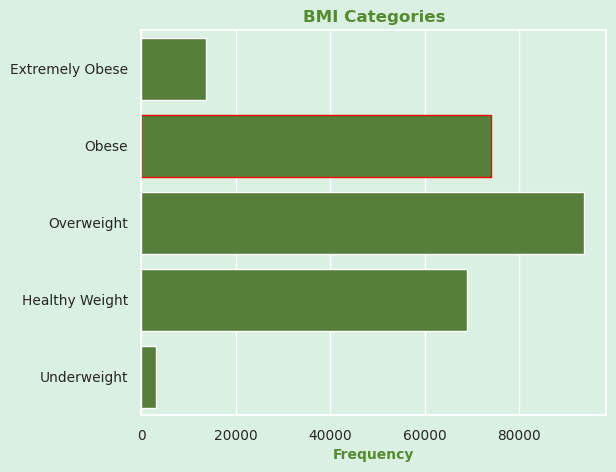

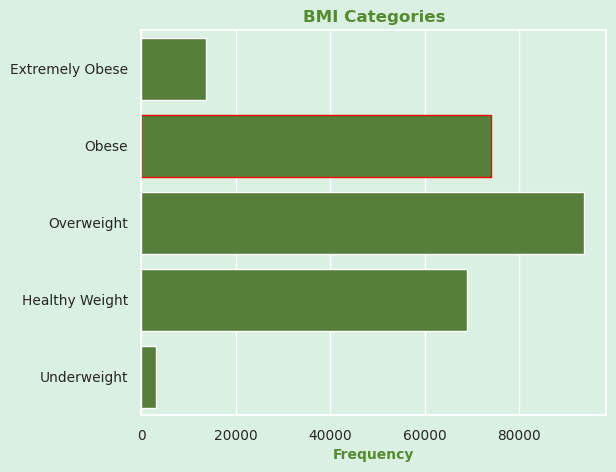

In [1]:
from backend.utils import plots

plots.plot_bmi_category(32)

In [18]:
from backend.utils.result_generator import generate_results

data = {
        "Name": "Jane Doe", "HighBP": 1, "HighChol": 1, "Height": 2.0, "Weight": 87.0,
        "SticksDay": 10, "YearsSmoked": 12, "HeartDiseaseorAttack": 1, "PhysActivity": 1,
        "Fruits": 1, "Veggies": 0, "HvyAlcoholConsump": 1, "GenHlth": 2, "MentHlth": 23,
        "PhysHlth": 27, "DiffWalk": 1, "Age": 45, "Education": 5, "Income": 5, "Stroke":0, "Sex":1}
results = generate_results(data)

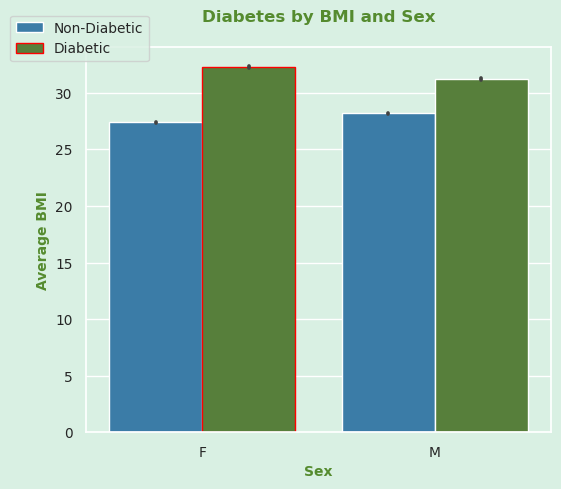

In [9]:
results['diagnosis_plot']

# Playing with reportlab

In [2]:
from reportlab.pdfgen import canvas

In [4]:
c = canvas.Canvas('hello.pdf')
c.drawString(100, 750, "Welcome to Reportlab!")
c.show()

AttributeError: 'Canvas' object has no attribute 'show'

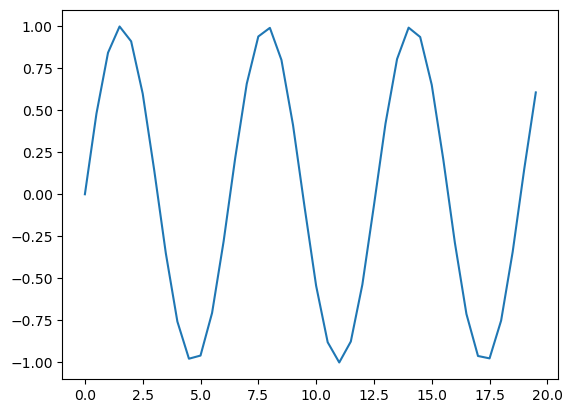

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 20, .5)
y = np.sin(x)
fig = plt.plot(x, y)

In [13]:
def img():
    fig = plt.figure(figsize=(4,4))
    x = np.arange(0, 20, .5)
    y = np.sin(x)
    plt.plot(x, y)

    return fig

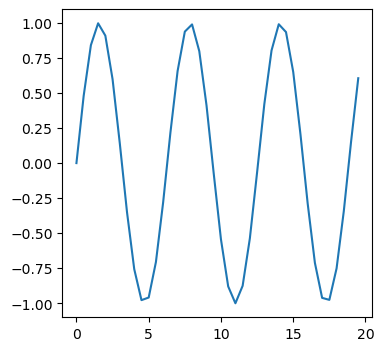

In [14]:
fig = img()

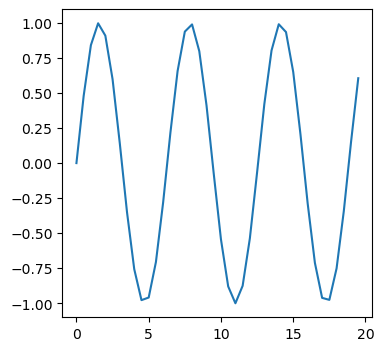

In [16]:
fig